In [1]:
import tensorflow as tf

# load data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

/home/hung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# configure neural network 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),  # Input layer, 724 units
  tf.keras.layers.Dense(256, activation=tf.nn.relu),  # hidden layer, 512 units, ReLU activator
  tf.keras.layers.Dropout(0.2),  # drop out from hidden layer
  tf.keras.layers.Dense(128, activation=tf.nn.relu),  # hidden layer, 512 units, ReLU activator
  tf.keras.layers.Dropout(0.2),  # drop out from hidden layer
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # output layer, 10 units (= 10 digits), softmax activator
])

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.2609 - acc: 0.9200
Epoch 2/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.1237 - acc: 0.9625
Epoch 3/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0917 - acc: 0.9722
Epoch 4/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.0782 - acc: 0.9755
Epoch 5/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.0665 - acc: 0.9787


In [5]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 39us/step


[0.07057081874780997, 0.979]

In [27]:
model.predict(x_test[0:10].reshape([-1,28,28])).argmax(axis=-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [30]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [35]:
err_ids = []
for i in range(len(x_test)):
    if (model.predict(x_test[i].reshape([-1,28,28])).argmax(axis=-1) != y_test[i]):
        err_ids.append(i)
print(err_ids)

[149, 151, 217, 247, 259, 321, 381, 445, 449, 495, 578, 582, 619, 684, 691, 720, 740, 810, 844, 938, 947, 951, 956, 959, 965, 1014, 1039, 1044, 1112, 1156, 1181, 1182, 1224, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1393, 1414, 1444, 1494, 1500, 1522, 1530, 1549, 1553, 1571, 1681, 1717, 1737, 1754, 1878, 1901, 1941, 1982, 2004, 2016, 2024, 2053, 2073, 2098, 2109, 2118, 2130, 2135, 2182, 2189, 2272, 2293, 2369, 2387, 2406, 2408, 2414, 2422, 2433, 2447, 2488, 2607, 2648, 2654, 2877, 2896, 2927, 2939, 2952, 2953, 2979, 2995, 3030, 3060, 3073, 3117, 3130, 3206, 3342, 3388, 3405, 3475, 3503, 3520, 3549, 3550, 3558, 3597, 3604, 3751, 3776, 3780, 3818, 3853, 3893, 3906, 3941, 3943, 3995, 4065, 4075, 4078, 4140, 4163, 4176, 4224, 4248, 4306, 4382, 4433, 4443, 4497, 4534, 4536, 4601, 4619, 4635, 4690, 4731, 4740, 4761, 4807, 4808, 4814, 4823, 4860, 4880, 4966, 5457, 5600, 5623, 5642, 5676, 5734, 5749, 5887, 5926, 5936, 5955, 5973, 6011, 6023, 6059, 6511, 6555, 6571, 6574, 6576, 6597, 6625, 6632

In [50]:
err_ids = []
eval_ = (model.predict(x_test).argmax(axis=-1) == y_test)
for i in range(len(eval_)):
    if not eval_[i]:
        err_ids.append(i)
print(err_ids)
print(len(err_ids))

[149, 151, 217, 247, 259, 321, 381, 445, 449, 495, 578, 582, 619, 684, 691, 720, 740, 810, 844, 938, 947, 951, 956, 959, 965, 1014, 1039, 1044, 1112, 1156, 1181, 1182, 1224, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1393, 1414, 1444, 1494, 1500, 1522, 1530, 1549, 1553, 1571, 1681, 1717, 1737, 1754, 1878, 1901, 1941, 1982, 2004, 2016, 2024, 2053, 2073, 2098, 2109, 2118, 2130, 2135, 2182, 2189, 2272, 2293, 2369, 2387, 2406, 2408, 2414, 2422, 2433, 2447, 2488, 2607, 2648, 2654, 2877, 2896, 2927, 2939, 2952, 2953, 2979, 2995, 3030, 3060, 3073, 3117, 3130, 3206, 3342, 3388, 3405, 3475, 3503, 3520, 3549, 3550, 3558, 3597, 3604, 3751, 3776, 3780, 3818, 3853, 3893, 3906, 3941, 3943, 3995, 4065, 4075, 4078, 4140, 4163, 4176, 4224, 4248, 4306, 4382, 4433, 4443, 4497, 4534, 4536, 4601, 4619, 4635, 4690, 4731, 4740, 4761, 4807, 4808, 4814, 4823, 4860, 4880, 4966, 5457, 5600, 5623, 5642, 5676, 5734, 5749, 5887, 5926, 5936, 5955, 5973, 6011, 6023, 6059, 6511, 6555, 6571, 6574, 6576, 6597, 6625, 6632

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

Prediction: 9
Actual: 2
Prediction: 8
Actual: 9
Prediction: 5
Actual: 6
Prediction: 2
Actual: 4
Prediction: 0
Actual: 6
Prediction: 7
Actual: 2
Prediction: 7
Actual: 3
Prediction: 0
Actual: 6
Prediction: 5
Actual: 3
Prediction: 2
Actual: 8


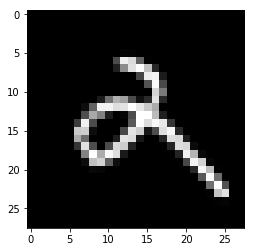

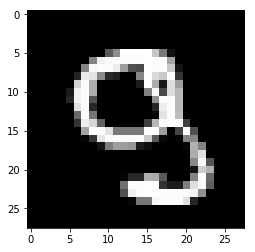

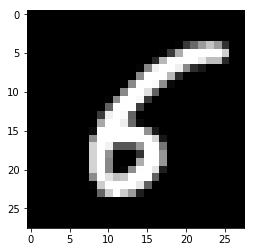

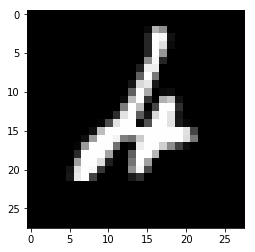

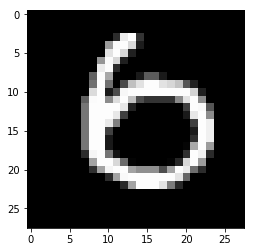

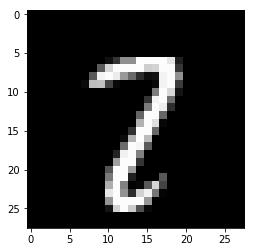

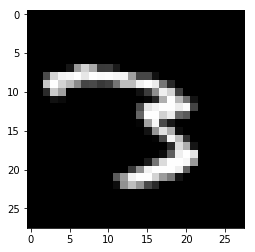

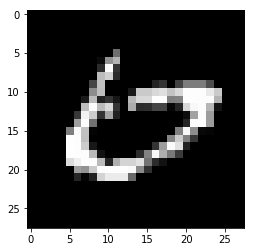

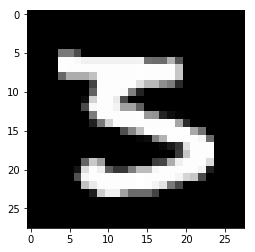

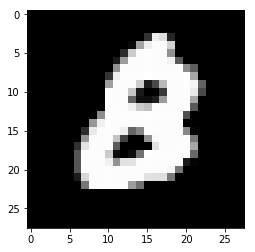

In [54]:
for idd in err_ids[0:10]:
    print("Prediction:", model.predict(x_test[idd].reshape([-1,28,28])).argmax(axis=-1)[0])
    print("Actual:", y_test[idd])
    plt.figure()
    plt.imshow((255*x_test[idd]).astype(int), cmap='gray')

In [43]:
# Train error
err_ids = []
eval_ = (model.predict(x_train).argmax(axis=-1) == y_train)
for i in range(len(eval_)):
    if not eval_[i]:
        err_ids.append(i)
print(err_ids)
print(len(err_ids))

[80, 172, 212, 224, 418, 470, 494, 500, 635, 670, 902, 974, 995, 1030, 1404, 1512, 1604, 1634, 1772, 2044, 2098, 2676, 2720, 2734, 2761, 2803, 2901, 2958, 3220, 3268, 3392, 3510, 3692, 3696, 3756, 4028, 4122, 4142, 4382, 4468, 4476, 4638, 4694, 5002, 5103, 5174, 5332, 5430, 5516, 5554, 5638, 5748, 5821, 5826, 5896, 6102, 6202, 6387, 6448, 6658, 6711, 6808, 6810, 6816, 6844, 6848, 6885, 6920, 6930, 7010, 7058, 7080, 7270, 7308, 7584, 7678, 7784, 7851, 7994, 8072, 8118, 8200, 8202, 8480, 8709, 8729, 8772, 8799, 8857, 8898, 9075, 9098, 9256, 9450, 10042, 10064, 10205, 10224, 10245, 10251, 10297, 10756, 10986, 10994, 11039, 11210, 11501, 11570, 11657, 11781, 11797, 11949, 12012, 12305, 12559, 12603, 12650, 12679, 12744, 12808, 12877, 12984, 13080, 13318, 13376, 13677, 13831, 14008, 14222, 14314, 14333, 14528, 14580, 14700, 14740, 14790, 14851, 15106, 15276, 15526, 15610, 15942, 16290, 16376, 16488, 16530, 16560, 16676, 16678, 16706, 17001, 17059, 17121, 17192, 17220, 17244, 17551, 17772, 1

Prediction: 2
Actual: 6


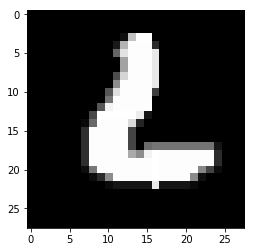

In [49]:
idd = 49026
print("Prediction:", model.predict(x_train[idd].reshape([-1,28,28])).argmax(axis=-1)[0])
print("Actual:", y_train[idd])
plt.imshow((255*x_train[idd]).astype(int), cmap='gray')

In [55]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2591 - acc: 0.9198 - val_loss: 0.0604 - val_acc: 0.9797
Epoch 2/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0887 - acc: 0.9733 - val_loss: 0.0448 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0645 - acc: 0.9809 - val_loss: 0.0374 - val_acc: 0.9868
Epoch 4/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0513 - acc: 0.9852 - val_loss: 0.0283 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0455 - acc: 0.9861 - val_loss: 0.0310 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0408 - acc: 0.9878 - val_loss: 0.0314 - val_acc: 0.9897
Epoch 7/12
60000/60000 [=========================

In [58]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.20))
model1.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model1.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1469 - acc: 0.9547 - val_loss: 0.0416 - val_acc: 0.9861
Epoch 2/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0490 - acc: 0.9855 - val_loss: 0.0304 - val_acc: 0.9879
Epoch 3/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0380 - acc: 0.9885 - val_loss: 0.0182 - val_acc: 0.9946
Epoch 4/12
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0316 - acc: 0.9902 - val_loss: 0.0256 - val_acc: 0.9925
Epoch 5/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0263 - acc: 0.9920 - val_loss: 0.0226 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0274 - val_acc: 0.9906
Epoch 7/12
60000/60000 [=========================

In [70]:
err_ids = []
eval_ = (model1.predict(x_test).argmax(axis=-1) == y_test.argmax(axis=-1))
for i in range(len(eval_)):
    if not eval_[i]:
        err_ids.append(i)
print(err_ids)
print(len(err_ids))

[321, 449, 659, 947, 1014, 1039, 1232, 1247, 1260, 1378, 1737, 1901, 2118, 2130, 2293, 2447, 2462, 2597, 2654, 2771, 2939, 2953, 3225, 3422, 3520, 3762, 3808, 4176, 4284, 4382, 4571, 4740, 4823, 4860, 5165, 5937, 5955, 6173, 6576, 6651, 7216, 8527, 9015, 9642, 9729]
45


Prediction: 9
Actual: 4


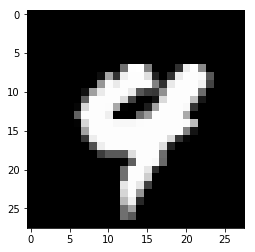

In [104]:
idd = 4860
print("Prediction:", model2.predict(x_test[idd].reshape([1,28,28,1])).argmax(axis=-1)[0])
print("Actual:", y_test[idd].argmax(axis=-1))
plt.imshow((255*x_test[idd].reshape([28,28])).astype(int), cmap='gray')

In [87]:
err_ids1 = []
eval_ = (model1.predict(x_train).argmax(axis=-1) == y_train.argmax(axis=-1))
for i in range(len(eval_)):
    if not eval_[i]:
        err_ids1.append(i)
print(err_ids1)
print(len(err_ids1))

[494, 1404, 1604, 1940, 2148, 3532, 4476, 5740, 6269, 6347, 7080, 7270, 8480, 8701, 10994, 12183, 13508, 13854, 14008, 14700, 16130, 16549, 16678, 16706, 17739, 18190, 18508, 18598, 19360, 20962, 22320, 22779, 23962, 25159, 25678, 25790, 26471, 26560, 26622, 26626, 26748, 28116, 30792, 32445, 32558, 33412, 33506, 34750, 35310, 35464, 36089, 37038, 37680, 38397, 38526, 38700, 39427, 40144, 40824, 41156, 41218, 41284, 42112, 42566, 43454, 43574, 44378, 45352, 46078, 46314, 46857, 46938, 47094, 47340, 47600, 49164, 49212, 49960, 51248, 51944, 52854, 53063, 53638, 53806, 54264, 56596, 57744, 57882, 59701, 59915]
90


In [76]:
model1.save("MNIST9955.h5")

In [77]:
from keras.models import load_model
model2 = load_model('MNIST9955.h5')

Prediction: 4
Actual: 9


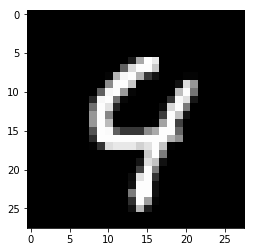

In [100]:
idd = 57744
print("Prediction:", model2.predict(x_train[idd].reshape([1,28,28,1])).argmax(axis=-1)[0])
print("Actual:", y_train[idd].argmax(axis=-1))
plt.imshow((255*x_train[idd].reshape([28,28])).astype(int), cmap='gray')

In [82]:
x_train[idd].shape

(28, 28, 1)

In [89]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
__________

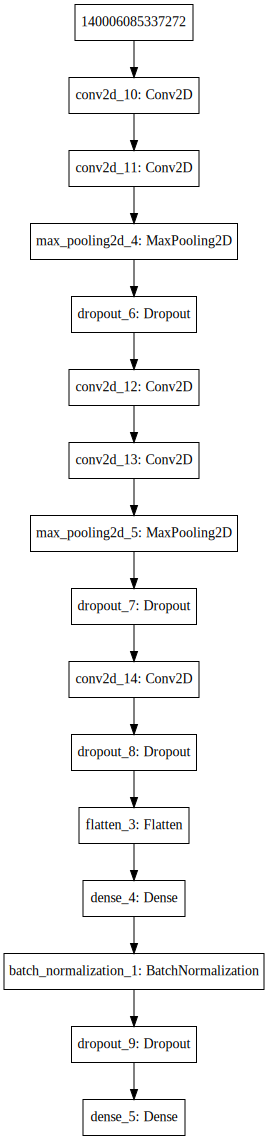

In [90]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model2).create(prog='dot', format='svg'))

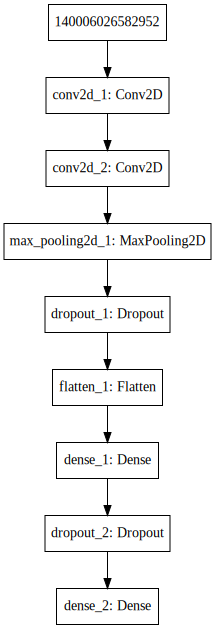

In [91]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))